In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [5]:
(p.shape,q.shape)

((4, 2), (5, 2))

In [12]:
def naive(p, q):
    ''' fill your code in here...
    '''
    d = np.ndarray((p.shape[0],q.shape[0]))
    for i in range(p.shape[0]):
        p_i = p[i]
        for j in range(q.shape[0]):
            q_j = q[j]
            d_ij = np.sqrt( (p_i[0]- q_j[0])*(p_i[0]- q_j[0]) + (p_i[1]- q_j[1])*(p_i[1]- q_j[1]) )
            d[i][j] = d_ij
    return d

In [13]:
print(naive(p,q))

[[0.60599073 0.93659449 0.91124856 0.59321356 0.27561751]
 [0.80746999 0.21102354 0.67268649 0.22495084 0.46534491]
 [0.35654215 0.75217493 0.57200052 0.49900068 0.23310825]
 [0.67281411 0.52407472 0.31520226 0.63212897 0.70277376]]


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [14]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [15]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [54]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    d = np.sqrt(np.sum((p[rows.ravel()]-q[cols.ravel()])**2,axis=1)).reshape((p.shape[0], q.shape[0]))
    return d

In [55]:
with_indices(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [56]:
with_indices(p,q) - naive(p,q)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [57]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

In [58]:
scipy_version(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Numpy Magic

In [70]:
((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2)

array([[[3.62656651e-01, 4.56811947e-03],
        [7.38926342e-03, 8.69819975e-01],
        [5.88860365e-01, 2.41513582e-01],
        [1.70571630e-03, 3.50196606e-01],
        [2.45672153e-03, 7.35082878e-02]],

       [[2.15794994e-01, 4.36212786e-01],
        [2.67408786e-03, 4.18568486e-02],
        [3.96522050e-01, 5.59850583e-02],
        [3.20312369e-02, 1.85716431e-02],
        [7.76285799e-03, 2.08783028e-01]],

       [[1.08501841e-01, 1.86204668e-02],
        [3.49139711e-02, 5.30853152e-01],
        [2.44588353e-01, 8.25962412e-02],
        [9.86675732e-02, 1.50334104e-01],
        [4.98398057e-02, 4.49964894e-03]],

       [[8.38219937e-04, 4.51840603e-01],
        [2.37458321e-01, 3.71959956e-02],
        [3.76804773e-02, 6.16719852e-02],
        [3.77681654e-01, 2.19053751e-02],
        [2.74253785e-01, 2.19637175e-01]]])

In [59]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

In [60]:
tensor_broadcasting(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

# Compare methods

In [71]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

51.4 ms ± 3.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.63 ms ± 770 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
989 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.28 ms ± 219 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


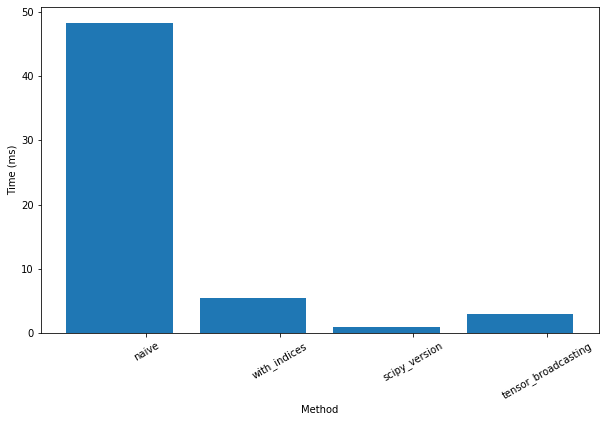

In [72]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()